In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

In [2]:
import pandas as pd

In [3]:
books = pd.read_csv('books.csv')

In [4]:
books.head()

isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?id=OmQaw...   
3  http://books.google.com/books/content?id=FKo2T...   
4  http://books.google.com/books/content?id=XhQ5X...   

                                         description  published_year  \
0  A NOVEL THAT READERS and critics have been eag...          2004.0   
1  A new 'Christie for Christmas' -- a full-lengt...          2000.0   
2  Volume Two of Stephen Donaldson's acclaimed se...          1982.0   
3  A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4  Lewis' work on the nature of love divides love...          2002.0   

   average_rating  num_pages  ratings_count  
0            3.85      247.0          361.0  
1            3.83      241.0         5164.0  
2            3.97      479.0          172.0  
3            3.93      512.0        29532.0  
4            4.15      170.0        33684.0

In [5]:
from ydata_profiling import ProfileReport
profile = ProfileReport(books, title="Dataset Profile", explorative=True)
profile.to_notebook_iframe()  # For Jupyter notebooks in VS Code

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:00<00:00, 17.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

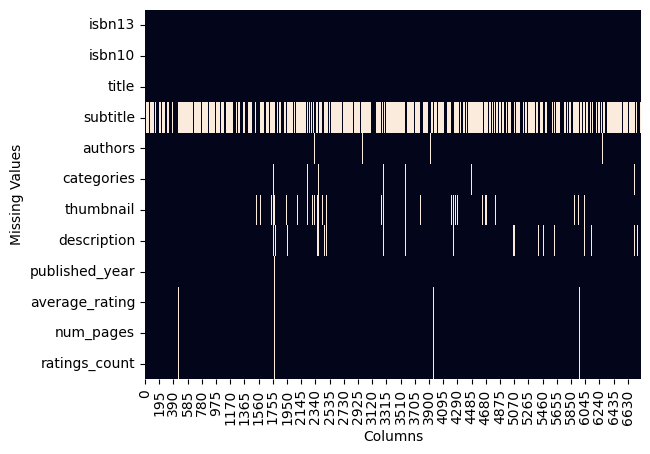

In [7]:
ax = plt.axes()
#isna(): return df of same shape as books but with bolean values, true for missing values and false for non-missing values
# Transpose so that variables becomes row and observations becomes columns for readable visualization
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)
plt.xlabel("Columns")
plt.ylabel("Missing Values")

plt.show()


1. Data Quality Tiers:
The variables clearly fall into different completeness categories:
- Excellent completeness: isbn13, isbn10, title
- Good completeness: authors, categories, published_year, average_rating, num_pages, ratings_count
- Poor completeness: subtitle, extensive missing data
- Moderate missing data: thumbnail, description

2. Missing data patterns:
- Most variables show random scattered missing patterns
- Below appears white lines across multiple variables indicating that this might be scraped from multiple sources, like different book APIs or websites.

3. Insights:
- Books missing subtitles likely came from sources that don't provide subtitle

In [8]:
# BIAS ANALYSIS: Investigating missing descriptions to detect potential recommendation bias
# Before removing books with missing descriptions, we need to understand if these books
# share common characteristics (e.g., older publication years, shorter page counts, 
# specific genres, etc.) that could introduce systematic bias into our recommender system.
# If missing descriptions correlate with certain book attributes, removing them could
# skew recommendations toward/away from particular types of books.
import numpy as np
books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"] = 2025 - books["published_year"]

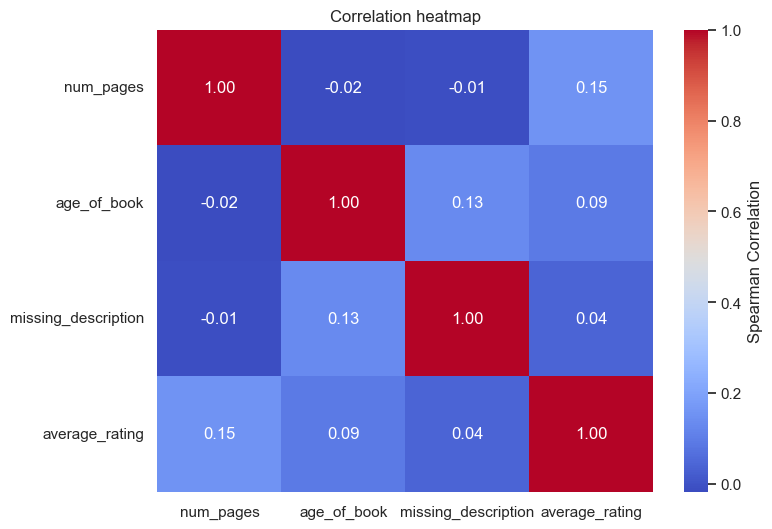

In [9]:
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]
correlation_matrix = books[columns_of_interest].corr(method= "spearman") #spearman instead of pearson because spearman is for binary values while pearson for continuous values
sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label":"Spearman Correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

In [10]:
books[(books["description"].isna()) |
      (books["num_pages"].isna()) |
      (books["average_rating"].isna()) |
      (books["published_year"].isna())
      ]

isbn13      isbn10  \
37    9780006906018  000690601X   
60    9780007127740  000712774X   
99    9780020442806  0020442807   
102   9780023513206  0023513209   
105   9780026995016  0026995018   
...             ...         ...   
6787  9783464371640  3464371646   
6788  9783540292128  3540292128   
6798  9787506435673  7506435675   
6806  9788185944609  8185944601   
6807  9788445074879  8445074873   

                                                  title  \
37                    The Princess of the Chalet School   
60                                  The illustrated man   
99    The Chronicles of Narnia: Lion, the witch and ...   
102                                   Reason in History   
105                                             Spandau   
...                                                 ...   
6787                                        About a Boy   
6788             Enzyme-Catalyzed Synthesis of Polymers   
6798                                         Good Fight   
6806                               Secrets Of The Heart   
6807                                     Fahrenheit 451   

                                               subtitle  \
37                                                  NaN   
60                                                  NaN   
99                                                  NaN   
102   A General Introduction to the Philosophy of Hi...   
105                                  The Secret Diaries   
...                                                 ...   
6787                                                NaN   
6788                                                NaN   
6798                                                NaN   
6806                                                NaN   
6807                                                NaN   

                                         authors        categories  \
37                        Elinor Mary Brent-Dyer  Juvenile Fiction   
60                                  Ray Bradbury           Fiction   
99                           Clive Staples Lewis       Fairy tales   
102                Georg Wilhelm Friedrich Hegel        Philosophy   
105                                 Albert Speer           History   
...                                          ...               ...   
6787                                 Nick Hornby               NaN   
6788  Shiro Kobayashi;Helmut Ritter;David Kaplan           Science   
6798                   Judd Winick;Matthew Clark  Juvenile Fiction   
6806                               Khalil Gibran         Mysticism   
6807                                Ray Bradbury      Book burning   

                                              thumbnail  \
37    http://books.google.com/books/content?id=EJcQP...   
60    http://books.google.com/books/content?id=kePql...   
99                                                  NaN   
102   http://books.google.com/books/content?id=BCvcY...   
105                                                 NaN   
...                                                 ...   
6787  http://books.google.com/books/content?id=PuDYw...   
6788  http://books.google.com/books/content?id=WXOym...   
6798  http://books.google.com/books/content?id=xGPZA...   
6806  http://books.google.com/books/content?id=XcrVp...   
6807                                                NaN   

                                            description  published_year  \
37                                                  NaN          2000.0   
60                                                  NaN          2002.0   
99                                                  NaN          1978.0   
102                                                 NaN          1953.0   
105                                                 NaN          1976.0   
...                                                 ...             ...   
6787                                                NaN          2002.0   
6788                    

In [11]:
# Missing less than 5% of our dataset so we'll drop them
# Create a new dataset without all of these missing values
book_missing = books[~(books["description"].isna()) &
      ~(books["num_pages"].isna()) &
      ~(books["average_rating"].isna()) &
      ~(books["published_year"].isna())
      ]

In [12]:
book_missing

isbn13      isbn10  \
0     9780002005883  0002005883   
1     9780002261982  0002261987   
2     9780006163831  0006163831   
3     9780006178736  0006178731   
4     9780006280897  0006280897   
...             ...         ...   
6803  9788173031014  8173031010   
6804  9788179921623  817992162X   
6805  9788185300535  8185300534   
6808  9789027712059  9027712050   
6809  9789042003408  9042003405   

                                                  title  \
0                                                Gilead   
1                                          Spider's Web   
2                                          The One Tree   
3                                        Rage of angels   
4                                        The Four Loves   
...                                                 ...   
6803                                Journey to the East   
6804  The Monk Who Sold His Ferrari: A Fable About F...   
6805                                          I Am that   
6808                           The Berlin Phenomenology   
6809                          'I'm Telling You Stories'   

                                            subtitle  \
0                                                NaN   
1                                            A Novel   
2                                                NaN   
3                                                NaN   
4                                                NaN   
...                                              ...   
6803                                             NaN   
6804                                             NaN   
6805             Talks with Sri Nisargadatta Maharaj   
6808                                             NaN   
6809  Jeanette Winterson and the Politics of Reading   

                                           authors  \
0                               Marilynne Robinson   
1                  Charles Osborne;Agatha Christie   
2                             Stephen R. Donaldson   
3                                   Sidney Sheldon   
4                              Clive Staples Lewis   
...                                            ...   
6803                                 Hermann Hesse   
6804                                  Robin Sharma   
6805  Sri Nisargadatta Maharaj;Sudhakar S. Dikshit   
6808                 Georg Wilhelm Friedrich Hegel   
6809                        Helena Grice;Tim Woods   

                         categories  \
0                           Fiction   
1     Detective and mystery stories   
2                  American fiction   
3                           Fiction   
4                    Christian life   
...                             ...   
6803              Adventure stories   
6804               Health & Fitness   
6805                     Philosophy   
6808                        History   
6809             Literary Criticism   

                                              thumbnail  \
0     http://books.google.com/books/content?id=KQZCP...   
1     http://books.google.com/books/content?id=gA5GP...   
2     http://books.google.com/books/content?id=OmQaw...   
3     http://books.google.com/books/content?id=FKo2T...   
4     http://books.google.com/books/content?id=XhQ5X...   
...                                                 ...   
6803  http://books.google.com/books/content?id=rq6JP...   
6804  http://books.google.com/books/content?id=c_7mf...   
6805  http://books.google.com/books/content?id=Fv_JP...   
6808  http://books.google.com/books/content?id=Vy7Sk...   
6809  http://books.google.com/books/content?id=2lVyR...   

                                            description  published_year  \
0     A NOVEL THAT READERS and critics have been eag...          2004.0   
1     A new 'Christie for Christmas' -- a full-lengt...          2000.0   
2     Volume Two of Stephen Donaldson's acclaimed se...          1982.0   
3     A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4     Le

In [13]:
book_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)

categories  count
0                         Fiction   2523
1                Juvenile Fiction    534
2       Biography & Autobiography    391
3                         History    258
4              Literary Criticism    164
..                            ...    ...
519                   Aeronautics      1
518                    Childbirth      1
517             Consumer behavior      1
516                     Seduction      1
515  Conan (Fictitious character)      1

[531 rows x 2 columns]

In [14]:
book_missing.head(20)

isbn13      isbn10                                         title  \
0   9780002005883  0002005883                                        Gilead   
1   9780002261982  0002261987                                  Spider's Web   
2   9780006163831  0006163831                                  The One Tree   
3   9780006178736  0006178731                                Rage of angels   
4   9780006280897  0006280897                                The Four Loves   
5   9780006280934  0006280935                           The Problem of Pain   
6   9780006353287  0006353282                              An Autobiography   
7   9780006380832  0006380832                        Empires of the Monsoon   
8   9780006470229  000647022X                          The Gap Into Madness   
9   9780006472612  0006472613                            Master of the Game   
10  9780006479673  0006479677                             If Tomorrow Comes   
11  9780006480099  0006480098                         Assassin's Apprentice   
12  9780006482079  0006482074                           Warhost of Vastmark   
13  9780006483014  0006483011                      The Once and Future King   
14  9780006483892  0006483895                               Murder in LaMut   
15  9780006483908  0006483909                                Jimmy the Hand   
16  9780006486145  0006486142                              Well of Darkness   
17  9780006490456  000649045X  Witness for the Prosecution & Selected Plays   
18  9780006496434  0006496431                              The Little House   
19  9780006496878  0006496873                                Mystical Paths   

                                          subtitle  \
0                                              NaN   
1                                          A Novel   
2                                              NaN   
3                                              NaN   
4                                              NaN   
5                                              NaN   
6                                              NaN   
7   A History of the Indian Ocean and Its Invaders   
8                                  Chaos and Order   
9                                              NaN   
10                                             NaN   
11                                             NaN   
12                                             NaN   
13                                             NaN   
14                                             NaN   
15                                             NaN   
16                                             NaN   
17                                             NaN   
18                                             NaN   
19                                             NaN   

                            authors                           categories  \
0                Marilynne Robinson                              Fiction   
1   Charles Osborne;Agatha Christie        Detective and mystery stories   
2              Stephen R. Donaldson                     American fiction   
3                    Sidney Sheldon                              Fiction   
4               Clive Staples Lewis                       Christian life   
5               Clive Staples Lewis                       Christian life   
6                   Agatha Christie                     Authors, English   
7                      Richard Hall                         Africa, East   
8              Stephen R. Donaldson  Hyland, Morn (Fictitious character)   
9                    Sidney Sheldon                    Adventure stories   
10                   Sidney Sheldon                    Adventure stories   
11                       Robin Hobb                     American fiction   
12                      Janny Wurts                              Fiction   
13            Terence Hanbury White                   Arthurian romances   
14  Raymond E. Feist;Joel Rosenberg                    Adventure stories   


In [16]:
book_missing.loc[:,"words_in_description"] = book_missing["description"].str.split().str.len()

Min: 1
Max: 920
Mean: 66.32580298140464
Unique values: 344


(array([ 55.,  78., 230., 451., 496., 593., 636., 705., 481., 335., 231.,
        171., 139., 103.,  62.,  76.,  69.,  63.,  68.,  81.,  76.,  63.,
         64.,  58.,  69.,  87.,  63.,  44.,  45.,  64.,  59.,  56.,  57.,
         44.,  43.,  34.,  35.,  35.,  39.,  19.,  27.,  15.,  22.,  29.,
         19.,  17.,  10.,  10.,  16.,  17.,  12.,  11.,   6.,   9.,   7.,
          5.,   4.,   6.,   8.,   7.,   2.,   6.,   4.,   6.,   5.,   4.,
          6.,   1.,   5.,   1.,   0.,   4.,   0.,   1.,   2.,   1.,   2.,
          1.,   1.,   0.,   3.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,
          2.,   1.,   2.,   2.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

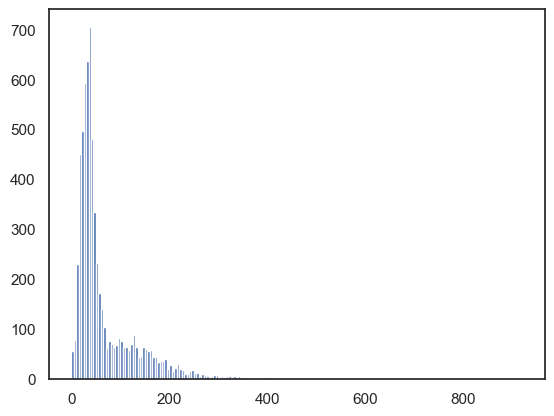

In [17]:
print(f"Min: {book_missing['words_in_description'].min()}")
print(f"Max: {book_missing['words_in_description'].max()}")
print(f"Mean: {book_missing['words_in_description'].mean()}")
print(f"Unique values: {book_missing['words_in_description'].nunique()}")

# Then choose appropriate bins
plt.hist(book_missing["words_in_description"], 
         bins=range(0, book_missing["words_in_description"].max() + 5, 5))  # Bins of 5 words

In [18]:
#pd.set_option('display.max_colwidth', None)

In [19]:
book_missing.loc[book_missing["words_in_description"].between(5, 14), "description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [20]:
book_missing.loc[book_missing["words_in_description"].between(15, 24), "description"]

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 947, dtype: object

In [21]:
book_missing.loc[book_missing["words_in_description"].between(24, 34), "description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
36      A magical and fantastic collection of early st...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1331, dtype: object

In [22]:
book_missing_25_words = book_missing[book_missing["words_in_description"] >= 25]

In [23]:
book_missing_25_words

isbn13      isbn10  \
0     9780002005883  0002005883   
1     9780002261982  0002261987   
3     9780006178736  0006178731   
4     9780006280897  0006280897   
5     9780006280934  0006280935   
...             ...         ...   
6802  9788172235222  8172235224   
6803  9788173031014  8173031010   
6804  9788179921623  817992162X   
6805  9788185300535  8185300534   
6808  9789027712059  9027712050   

                                                  title  \
0                                                Gilead   
1                                          Spider's Web   
3                                        Rage of angels   
4                                        The Four Loves   
5                                   The Problem of Pain   
...                                                 ...   
6802                                  Mistaken Identity   
6803                                Journey to the East   
6804  The Monk Who Sold His Ferrari: A Fable About F...   
6805                                          I Am that   
6808                           The Berlin Phenomenology   

                                 subtitle  \
0                                     NaN   
1                                 A Novel   
3                                     NaN   
4                                     NaN   
5                                     NaN   
...                                   ...   
6802                                  NaN   
6803                                  NaN   
6804                                  NaN   
6805  Talks with Sri Nisargadatta Maharaj   
6808                                  NaN   

                                           authors  \
0                               Marilynne Robinson   
1                  Charles Osborne;Agatha Christie   
3                                   Sidney Sheldon   
4                              Clive Staples Lewis   
5                              Clive Staples Lewis   
...                                            ...   
6802                              Nayantara Sahgal   
6803                                 Hermann Hesse   
6804                                  Robin Sharma   
6805  Sri Nisargadatta Maharaj;Sudhakar S. Dikshit   
6808                 Georg Wilhelm Friedrich Hegel   

                         categories  \
0                           Fiction   
1     Detective and mystery stories   
3                           Fiction   
4                    Christian life   
5                    Christian life   
...                             ...   
6802        Indic fiction (English)   
6803              Adventure stories   
6804               Health & Fitness   
6805                     Philosophy   
6808                        History   

                                              thumbnail  \
0     http://books.google.com/books/content?id=KQZCP...   
1     http://books.google.com/books/content?id=gA5GP...   
3     http://books.google.com/books/content?id=FKo2T...   
4     http://books.google.com/books/content?id=XhQ5X...   
5     http://books.google.com/books/content?id=Kk-uV...   
...                                                 ...   
6802  http://books.google.com/books/content?id=q-tKP...   
6803  http://books.google.com/books/content?id=rq6JP...   
6804  http://books.google.com/books/content?id=c_7mf...   
6805  http://books.google.com/books/content?id=Fv_JP...   
6808  http://books.google.com/books/content?id=Vy7Sk...   

                                            description  published_year  \
0     A NOVEL THAT READERS and critics have been eag...          2004.0   
1     A new 'Christie for Christmas' -- a full-lengt...          2000.0   
3     A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4     Lewis' work on the nature of love divides love...          2002.0   
5     "In The Problem of Pain, C.S. Lewis, one of th...          2002.0   
...                                                 ...          

In [25]:
# np.where(condition, value_if_true, value_if_false)
book_missing_25_words.loc[:,"title_and_subtitle"] = (
    np.where(
        book_missing_25_words["subtitle"].isna(), book_missing_25_words["title"],
        book_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1)
    )
)

In [26]:
book_missing_25_words

isbn13      isbn10  \
0     9780002005883  0002005883   
1     9780002261982  0002261987   
3     9780006178736  0006178731   
4     9780006280897  0006280897   
5     9780006280934  0006280935   
...             ...         ...   
6802  9788172235222  8172235224   
6803  9788173031014  8173031010   
6804  9788179921623  817992162X   
6805  9788185300535  8185300534   
6808  9789027712059  9027712050   

                                                  title  \
0                                                Gilead   
1                                          Spider's Web   
3                                        Rage of angels   
4                                        The Four Loves   
5                                   The Problem of Pain   
...                                                 ...   
6802                                  Mistaken Identity   
6803                                Journey to the East   
6804  The Monk Who Sold His Ferrari: A Fable About F...   
6805                                          I Am that   
6808                           The Berlin Phenomenology   

                                 subtitle  \
0                                     NaN   
1                                 A Novel   
3                                     NaN   
4                                     NaN   
5                                     NaN   
...                                   ...   
6802                                  NaN   
6803                                  NaN   
6804                                  NaN   
6805  Talks with Sri Nisargadatta Maharaj   
6808                                  NaN   

                                           authors  \
0                               Marilynne Robinson   
1                  Charles Osborne;Agatha Christie   
3                                   Sidney Sheldon   
4                              Clive Staples Lewis   
5                              Clive Staples Lewis   
...                                            ...   
6802                              Nayantara Sahgal   
6803                                 Hermann Hesse   
6804                                  Robin Sharma   
6805  Sri Nisargadatta Maharaj;Sudhakar S. Dikshit   
6808                 Georg Wilhelm Friedrich Hegel   

                         categories  \
0                           Fiction   
1     Detective and mystery stories   
3                           Fiction   
4                    Christian life   
5                    Christian life   
...                             ...   
6802        Indic fiction (English)   
6803              Adventure stories   
6804               Health & Fitness   
6805                     Philosophy   
6808                        History   

                                              thumbnail  \
0     http://books.google.com/books/content?id=KQZCP...   
1     http://books.google.com/books/content?id=gA5GP...   
3     http://books.google.com/books/content?id=FKo2T...   
4     http://books.google.com/books/content?id=XhQ5X...   
5     http://books.google.com/books/content?id=Kk-uV...   
...                                                 ...   
6802  http://books.google.com/books/content?id=q-tKP...   
6803  http://books.google.com/books/content?id=rq6JP...   
6804  http://books.google.com/books/content?id=c_7mf...   
6805  http://books.google.com/books/content?id=Fv_JP...   
6808  http://books.google.com/books/content?id=Vy7Sk...   

                                            description  published_year  \
0     A NOVEL THAT READERS and critics have been eag...          2004.0   
1     A new 'Christie for Christmas' -- a full-lengt...          2000.0   
3     A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4     Lewis' work on the nature of love divides love...          2002.0   
5     "In The Problem of Pain, C.S. Lewis, one of th...          2002.0   
...                                                 ...          

In [28]:
book_missing_25_words.loc[:, "tagged_description"] = book_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

In [29]:
book_missing_25_words

isbn13      isbn10  \
0     9780002005883  0002005883   
1     9780002261982  0002261987   
3     9780006178736  0006178731   
4     9780006280897  0006280897   
5     9780006280934  0006280935   
...             ...         ...   
6802  9788172235222  8172235224   
6803  9788173031014  8173031010   
6804  9788179921623  817992162X   
6805  9788185300535  8185300534   
6808  9789027712059  9027712050   

                                                  title  \
0                                                Gilead   
1                                          Spider's Web   
3                                        Rage of angels   
4                                        The Four Loves   
5                                   The Problem of Pain   
...                                                 ...   
6802                                  Mistaken Identity   
6803                                Journey to the East   
6804  The Monk Who Sold His Ferrari: A Fable About F...   
6805                                          I Am that   
6808                           The Berlin Phenomenology   

                                 subtitle  \
0                                     NaN   
1                                 A Novel   
3                                     NaN   
4                                     NaN   
5                                     NaN   
...                                   ...   
6802                                  NaN   
6803                                  NaN   
6804                                  NaN   
6805  Talks with Sri Nisargadatta Maharaj   
6808                                  NaN   

                                           authors  \
0                               Marilynne Robinson   
1                  Charles Osborne;Agatha Christie   
3                                   Sidney Sheldon   
4                              Clive Staples Lewis   
5                              Clive Staples Lewis   
...                                            ...   
6802                              Nayantara Sahgal   
6803                                 Hermann Hesse   
6804                                  Robin Sharma   
6805  Sri Nisargadatta Maharaj;Sudhakar S. Dikshit   
6808                 Georg Wilhelm Friedrich Hegel   

                         categories  \
0                           Fiction   
1     Detective and mystery stories   
3                           Fiction   
4                    Christian life   
5                    Christian life   
...                             ...   
6802        Indic fiction (English)   
6803              Adventure stories   
6804               Health & Fitness   
6805                     Philosophy   
6808                        History   

                                              thumbnail  \
0     http://books.google.com/books/content?id=KQZCP...   
1     http://books.google.com/books/content?id=gA5GP...   
3     http://books.google.com/books/content?id=FKo2T...   
4     http://books.google.com/books/content?id=XhQ5X...   
5     http://books.google.com/books/content?id=Kk-uV...   
...                                                 ...   
6802  http://books.google.com/books/content?id=q-tKP...   
6803  http://books.google.com/books/content?id=rq6JP...   
6804  http://books.google.com/books/content?id=c_7mf...   
6805  http://books.google.com/books/content?id=Fv_JP...   
6808  http://books.google.com/books/content?id=Vy7Sk...   

                                            description  published_year  \
0     A NOVEL THAT READERS and critics have been eag...          2004.0   
1     A new 'Christie for Christmas' -- a full-lengt...          2000.0   
3     A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4     Lewis' work on the nature of love divides love...          2002.0   
5     "In The Problem of Pain, C.S. Lewis, one of th...          2002.0   
...                                                 ...          

In [30]:
(
    book_missing_25_words
    .drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1)
    .to_csv("books_cleaned.csv", index=False)
)